# 1. Import lib

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.float_format", "{:.1f}".format)

## Add data


In [48]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [49]:
df = df[df['release_date'] < 2025]

# 2. Phân tích data theo thể loại TV series và movies (Phần 4)

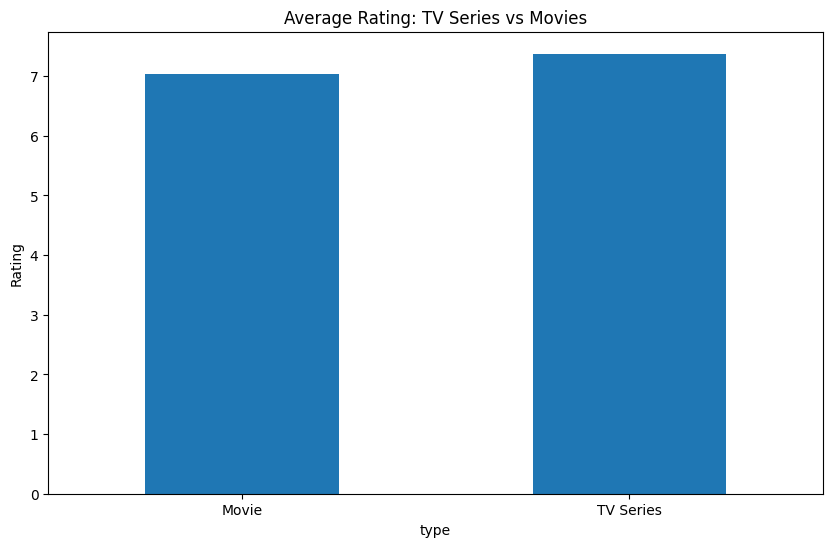


Average ratings:
type
Movie       7.0
TV Series   7.4
Name: rating, dtype: float64


In [28]:
# So sánh rating trung bình giữa TV Series và Movies
avg_ratings = df.groupby('type')['rating'].mean()
plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar')
plt.title('Average Rating: TV Series vs Movies')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

print("\nAverage ratings:")
print(avg_ratings)


Rating trung bình 2 loại phim xấp xỉ nhau

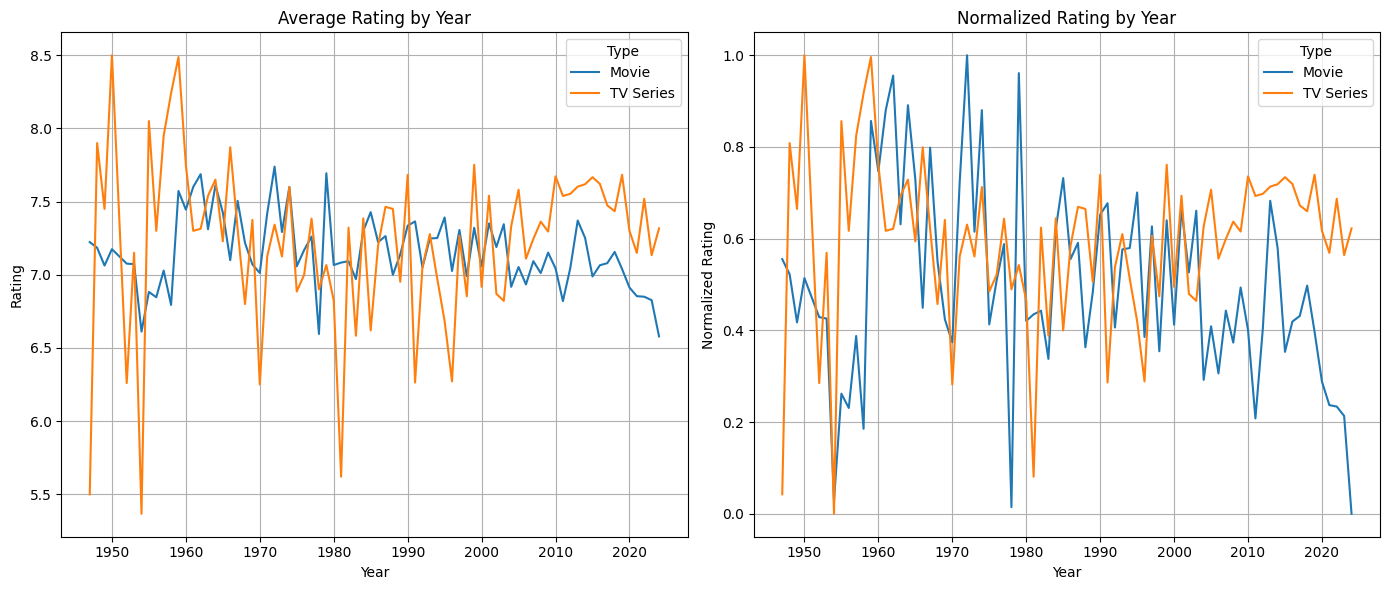


Yearly average ratings:
type          Movie  TV Series
release_date                  
1947.0          7.2        5.5
1948.0          7.2        7.9
1949.0          7.1        7.5
1950.0          7.2        8.5
1952.0          7.1        6.3
...             ...        ...
2020.0          6.9        7.3
2021.0          6.9        7.1
2022.0          6.8        7.5
2023.0          6.8        7.1
2024.0          6.6        7.3

[77 rows x 2 columns]

Normalized yearly ratings:
type          Movie  TV Series
release_date                  
1947.0          0.6        0.0
1948.0          0.5        0.8
1949.0          0.4        0.7
1950.0          0.5        1.0
1952.0          0.4        0.3
...             ...        ...
2020.0          0.3        0.6
2021.0          0.2        0.6
2022.0          0.2        0.7
2023.0          0.2        0.6
2024.0          0.0        0.6

[77 rows x 2 columns]


In [29]:
# Tính rating trung bình theo năm và type
yearly_ratings = df.groupby(['release_date', 'type'])['rating'].mean().unstack()
yearly_ratings = yearly_ratings.dropna()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
normalized_ratings = pd.DataFrame(scaler.fit_transform(yearly_ratings), 
                                  columns=yearly_ratings.columns, 
                                  index=yearly_ratings.index)

# Vẽ biểu đồ line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ gốc
yearly_ratings.plot(ax=axes[0], kind='line')
axes[0].set_title('Average Rating by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rating')
axes[0].legend(title='Type')
axes[0].grid(True)

# Biểu đồ chuẩn hóa
normalized_ratings.plot(ax=axes[1], kind='line')
axes[1].set_title('Normalized Rating by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Normalized Rating')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("\nYearly average ratings:")
print(yearly_ratings)

print("\nNormalized yearly ratings:")
print(normalized_ratings)

### 1. Biểu đồ trái: "Average Rating by Year"
🔹 Nhận xét chung:

- Phim truyền hình (đường màu cam) có sự biến động lớn hơn so với phim điện ảnh (đường màu xanh).
- Trước năm 1980, TV Series có sự dao động mạnh, có thời điểm đạt điểm trung bình trên 8.5, nhưng cũng có giai đoạn giảm xuống dưới 5.5.
- Từ khoảng năm 2000 trở đi, điểm số của TV Series có xu hướng ổn định hơn, duy trì quanh mức 7.5 - 8.0.
- Phim điện ảnh có xu hướng ổn định hơn trong suốt thời gian dài, dao động chủ yếu từ 6.5 đến 7.5.
- Sau năm 2015, điểm đánh giá của phim điện ảnh có xu hướng giảm nhẹ, trong khi TV Series vẫn duy trì mức cao.

### 2. Biểu đồ phải: "Normalized Rating by Year"
🔹 Nhận xét chung:

- Dữ liệu đã được chuẩn hóa về cùng một thang đo, giúp so sánh dễ dàng hơn.
- Phim truyền hình trước năm 1960 có sự dao động rất lớn (thể hiện qua các đỉnh cao và đáy sâu).
- Sau năm 2000, mức độ dao động giữa Movie & TV Series thu hẹp lại, nhưng phim truyền hình vẫn có xu hướng giữ điểm cao hơn.
- Phim điện ảnh gần đây có xu hướng giảm điểm đáng kể (có thể do sự thay đổi thị hiếu, sự bão hòa nội dung, hoặc do đánh giá ngày càng khắt khe hơn từ khán giả).

### 3. Sự khác biệt dữ liệu sau khi chuẩn hóa
🔸 Trước chuẩn hóa (biểu đồ trái):

- Biểu đồ hiển thị giá trị thực của điểm đánh giá, có ý nghĩa trực tiếp với người xem.
- Tuy nhiên, do sự khác biệt về quy mô và biên độ dao động giữa hai loại phim, có thể khó so sánh chính xác.

🔸 Sau chuẩn hóa (biểu đồ phải):

- Giúp thể hiện rõ hơn xu hướng thay đổi theo thời gian.
- Các khoảng biến động mạnh trước 1980 của Movies được thể hiện rõ hơn.
- Mức độ sụt giảm của phim điện ảnh từ 2015 trở đi cũng nổi bật hơn.


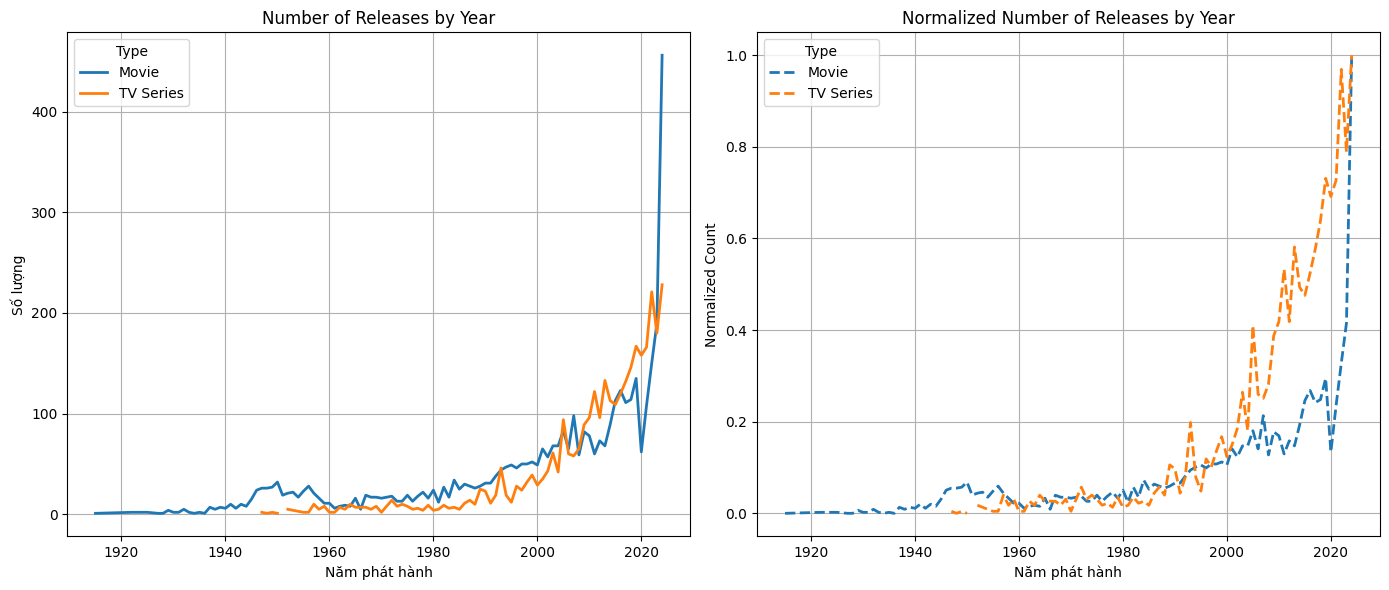

In [30]:
# Nhóm dữ liệu theo năm và loại
yearly_counts = df.groupby(['release_date', 'type']).size().unstack()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(yearly_counts), 
                                 columns=yearly_counts.columns, 
                                 index=yearly_counts.index)

# Vẽ biểu đồ gốc và biểu đồ chuẩn hóa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ số lượng gốc
yearly_counts.plot(ax=axes[0], kind='line', linewidth=2, markersize=2)
axes[0].set_title('Number of Releases by Year')
axes[0].set_xlabel('Năm phát hành')
axes[0].set_ylabel('Số lượng')
axes[0].legend(title='Type')
axes[0].grid(True)

# Biểu đồ chuẩn hóa
normalized_counts.plot(ax=axes[1], kind='line', linestyle='dashed', linewidth=2, markersize=2)
axes[1].set_title('Normalized Number of Releases by Year')
axes[1].set_xlabel('Năm phát hành')
axes[1].set_ylabel('Normalized Count')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Nhận xét biểu đồ xu hướng phát triển từng loại phimp
### 1. Trước chuẩn hóa
Số lượng thực tế:

- Trục Y thể hiện số lượng phim và TV Series phát hành hàng năm.
- Xu hướng tăng mạnh từ khoảng năm 2000 trở đi, đặc biệt là sau 2010.
- Phim điện ảnh (Movie) tăng đột biến sau 2020, trong khi TV Series cũng tăng đáng kể nhưng có xu hướng ổn định hơn.
- Trước 1950, số lượng sản phẩm phát hành rất thấp.
### 2. Sau chuẩn hóa 
Dữ liệu chuẩn hóa (đưa về khoảng 0 - 1):

- Biểu đồ giúp so sánh tốc độ tăng trưởng của hai loại hình phim mà không bị ảnh hưởng bởi quy mô tuyệt đối.
- Giai đoạn trước 1980, số lượng Movie và TV Series gần như tương đương.
- Từ 1990 trở đi, TV Series có tốc độ tăng nhanh hơn, thể hiện rõ ràng trong đường nét đứt màu cam.
- Sau 2010, cả hai loại hình phim đều có sự tăng trưởng đột biến.
- Phim điện ảnh có sự tăng mạnh sau 2020 (từ giá trị gần 0.4 lên gần 1), trong khi TV Series cũng tăng nhưng chậm hơn.
### 3. Sự khác biệt giữa hai biểu đồ
🔸 Trước chuẩn hóa (biểu đồ trái):

- Thể hiện rõ số lượng thực tế, giúp thấy được quy mô sản xuất qua từng năm.
- Tuy nhiên, do chênh lệch số lượng lớn, khó nhận ra tốc độ tăng trưởng của từng loại.

🔸 Sau chuẩn hóa (biểu đồ phải):

- Giúp so sánh sự tăng trưởng tương đối, dễ dàng thấy TV Series có tốc độ tăng mạnh hơn trước năm 2020, nhưng sau đó phim điện ảnh lại có cú bứt phá lớn.
- Sự gia tăng mạnh của TV Series từ khoảng năm 2000 trở đi được thể hiện rõ hơn.
- Biểu đồ sau khi chuẩn hóa phù hợp để thể hiện xu hướng phát triển trong khi biểu đồ trước khi chuẩn hóa phù hợp với thể hiện quy mô thực tế.

### Dự doán:
- Sô lượng movies đang tăng mạnh hơn TV series và sẽ tiếp tục tằng như vậy.


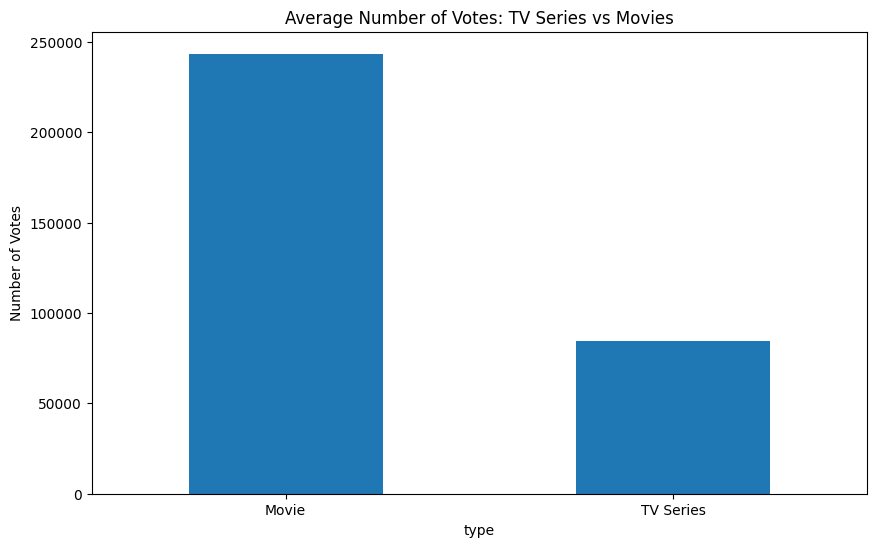


Average number of votes:
type
Movie       243469.7
TV Series    84288.9
Name: no_of_votes, dtype: float64


In [31]:
# So sánh số lượng vote trung bình
avg_votes = df.groupby('type')['no_of_votes'].mean()
plt.figure(figsize=(10,6))
avg_votes.plot(kind='bar')
plt.title('Average Number of Votes: TV Series vs Movies')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()

print("\nAverage number of votes:")
print(avg_votes)

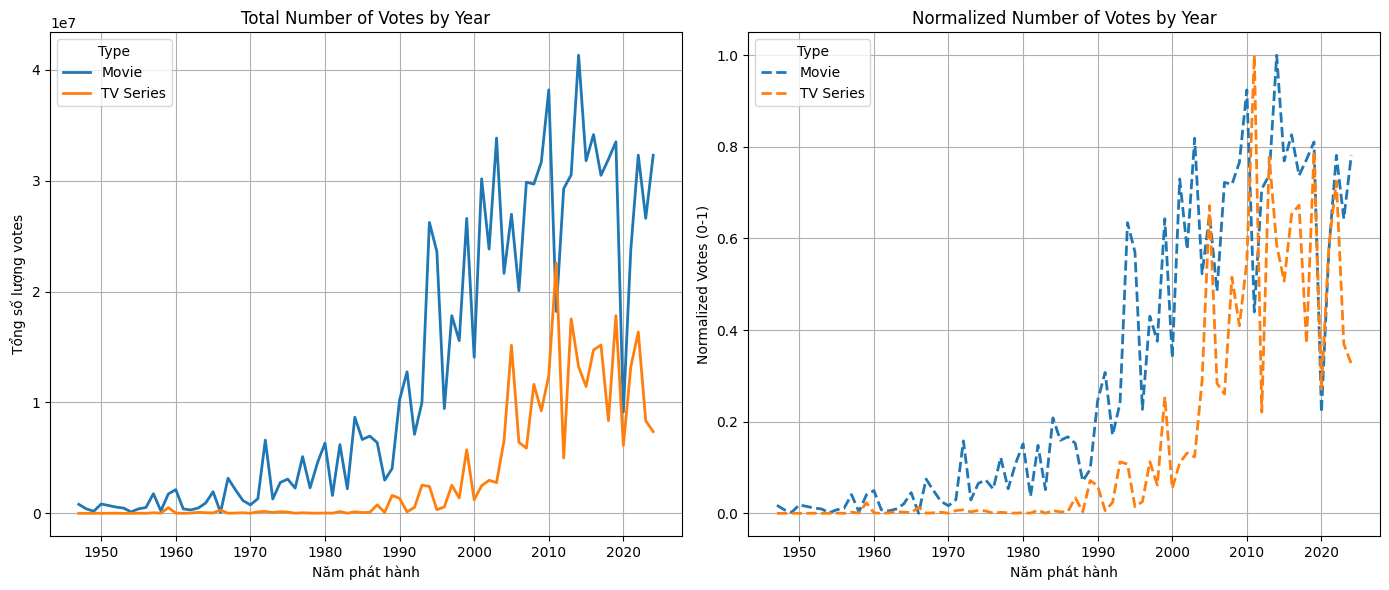

In [32]:
# Nhóm dữ liệu theo năm và loại, tính tổng số lượng votes
yearly_votes = df.groupby(['release_date', 'type'])['no_of_votes'].sum().unstack()
yearly_votes = yearly_votes.dropna()  # Loại bỏ giá trị NaN nếu có

# Chuẩn hóa dữ liệu votes theo Min-Max Scaling
scaler = MinMaxScaler()
normalized_votes = pd.DataFrame(scaler.fit_transform(yearly_votes), 
                                columns=yearly_votes.columns, 
                                index=yearly_votes.index)

# Vẽ hai biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ tổng số votes gốc
yearly_votes.plot(ax=axes[0], kind='line', linewidth=2, markersize=4)
axes[0].set_title('Total Number of Votes by Year')
axes[0].set_xlabel('Năm phát hành')
axes[0].set_ylabel('Tổng số lượng votes')
axes[0].legend(title='Type')
axes[0].grid(True)

# Biểu đồ chuẩn hóa
normalized_votes.plot(ax=axes[1], kind='line', linestyle='dashed', linewidth=2, markersize=4)
axes[1].set_title('Normalized Number of Votes by Year')
axes[1].set_xlabel('Năm phát hành')
axes[1].set_ylabel('Normalized Votes (0-1)')
axes[1].legend(title='Type')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 1. Trước chuẩn hóa: biểu đồ thể hiện quy mô, độ phổ biến giữa 2 thể loạiloại
- Tổng số lượng bình chọn thực tế:

Trục Y thể hiện tổng số lượng bình chọn (votes) theo từng năm.<br>
Phim điện ảnh (Movie) có số lượt bình chọn lớn hơn TV Series, đặc biệt sau năm 2000.<br>
Giai đoạn từ 1990 trở đi, số lượt bình chọn của cả hai thể loại đều tăng mạnh, đặc biệt là Movies có mức tăng đột biến từ năm 2000 đến 2020.<br>
TV Series cũng có sự tăng trưởng, nhưng vẫn ở mức thấp hơn so với Movies.<br>
Sau 2020, số lượt bình chọn có xu hướng giảm, có thể do số lượng sản phẩm mới chưa đủ thời gian để tích lũy nhiều đánh giá.<br>
### 2. Sau chuẩn hóa: biểu đồ thể hiện tốc độ phát tiển giữa 2 thể loại
- Dữ liệu chuẩn hóa về khoảng 0 - 1 giúp so sánh xu hướng:

Trước 1990, cả hai loại hình có lượng bình chọn thấp và khá đồng đều nhưng movies vẫn tăng nhanh hơn TV series. <br>
Từ 1990 trở đi, Movies tăng nhanh hơn, đạt đỉnh khoảng năm 2010.<br>
TV Series bắt đầu tăng mạnh từ khoảng 2005 và đạt đỉnh sau 2015, tuy tốc độ tằng trưởng ngang với movies nhưng ko ổn định.<br>
Sau 2020, cả hai thể loại đều giảm mạnh, có thể do các phim và TV Series mới chưa tích lũy được nhiều lượt đánh giá.<brbr>
### 3. Sự khác biệt giữa hai biểu đồ
🔸 Trước chuẩn hóa (biểu đồ trái):

- Giúp ta thấy được tổng số lượt bình chọn thực tế.
- Movies có quy mô bình chọn vượt trội hơn TV Series.
- Xu hướng chung là tăng mạnh sau 1990 và đạt đỉnh giai đoạn 2010 - 2020.
🔸 Sau chuẩn hóa (biểu đồ phải):

- Giúp so sánh tốc độ phát triển của từng thể loại, không bị ảnh hưởng bởi quy mô tổng thể.
- TV Series có giai đoạn tăng trưởng mạnh mẽ từ 2005 - 2015, điều này ít rõ ràng hơn trong biểu đồ chưa chuẩn hóa.
- Movies vẫn giữ được vị trí dẫn đầu trong phần lớn thời gian, nhưng không phải lúc nào cũng vượt trội hơn TV Series.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\3327133561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].str.split(',')


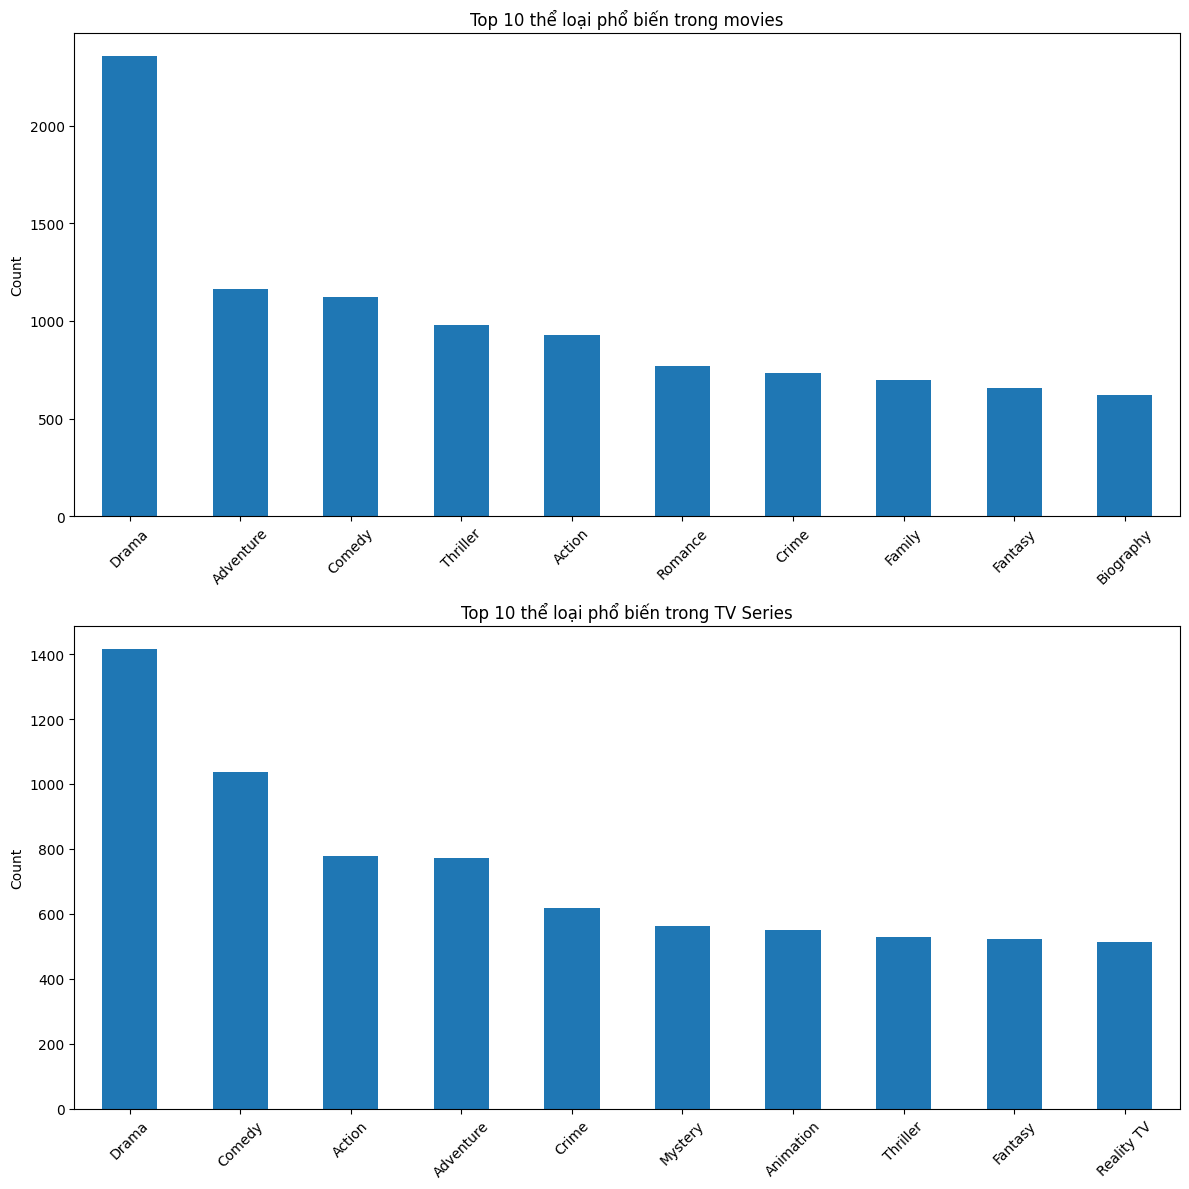


Top 5 genres in Movies:
Drama        2356
Adventure    1164
Comedy       1122
Thriller      978
Action        929
dtype: int64

Top 5 genres in TV Series:
Drama        1416
Comedy       1037
Action        777
Adventure     773
Crime         617
dtype: int64


In [33]:
# Tách cột genres thành list các thể loại
df['genres_list'] = df['genres'].str.split(',')

# Tạo hàm đếm thể loại
def count_genres(data):
    genre_counts = {}
    for genres in data['genres_list']:
        if isinstance(genres, list):
            for genre in genres:
                genre = genre.strip()
                genre_counts[genre] = genre_counts.get(genre, 0) + 1
    return pd.Series(genre_counts).sort_values(ascending=False)

# Phân tích thể loại phổ biến cho Movies và TV Series
movies_genres = count_genres(df[df['type'] == 'Movie'])
tv_genres = count_genres(df[df['type'] == 'TV Series'])

# Vẽ biểu đồ top 10 thể loại phổ biến
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

movies_genres.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 thể loại phổ biến trong movies')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

tv_genres.head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 thể loại phổ biến trong TV Series')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTop 5 genres in Movies:")
print(movies_genres.head())
print("\nTop 5 genres in TV Series:")
print(tv_genres.head())

Từ đồ thị, ta lựa chọn các thể loại chiếm số lượng lớn: Drama, adventure, comedy, action, thriller, crime.

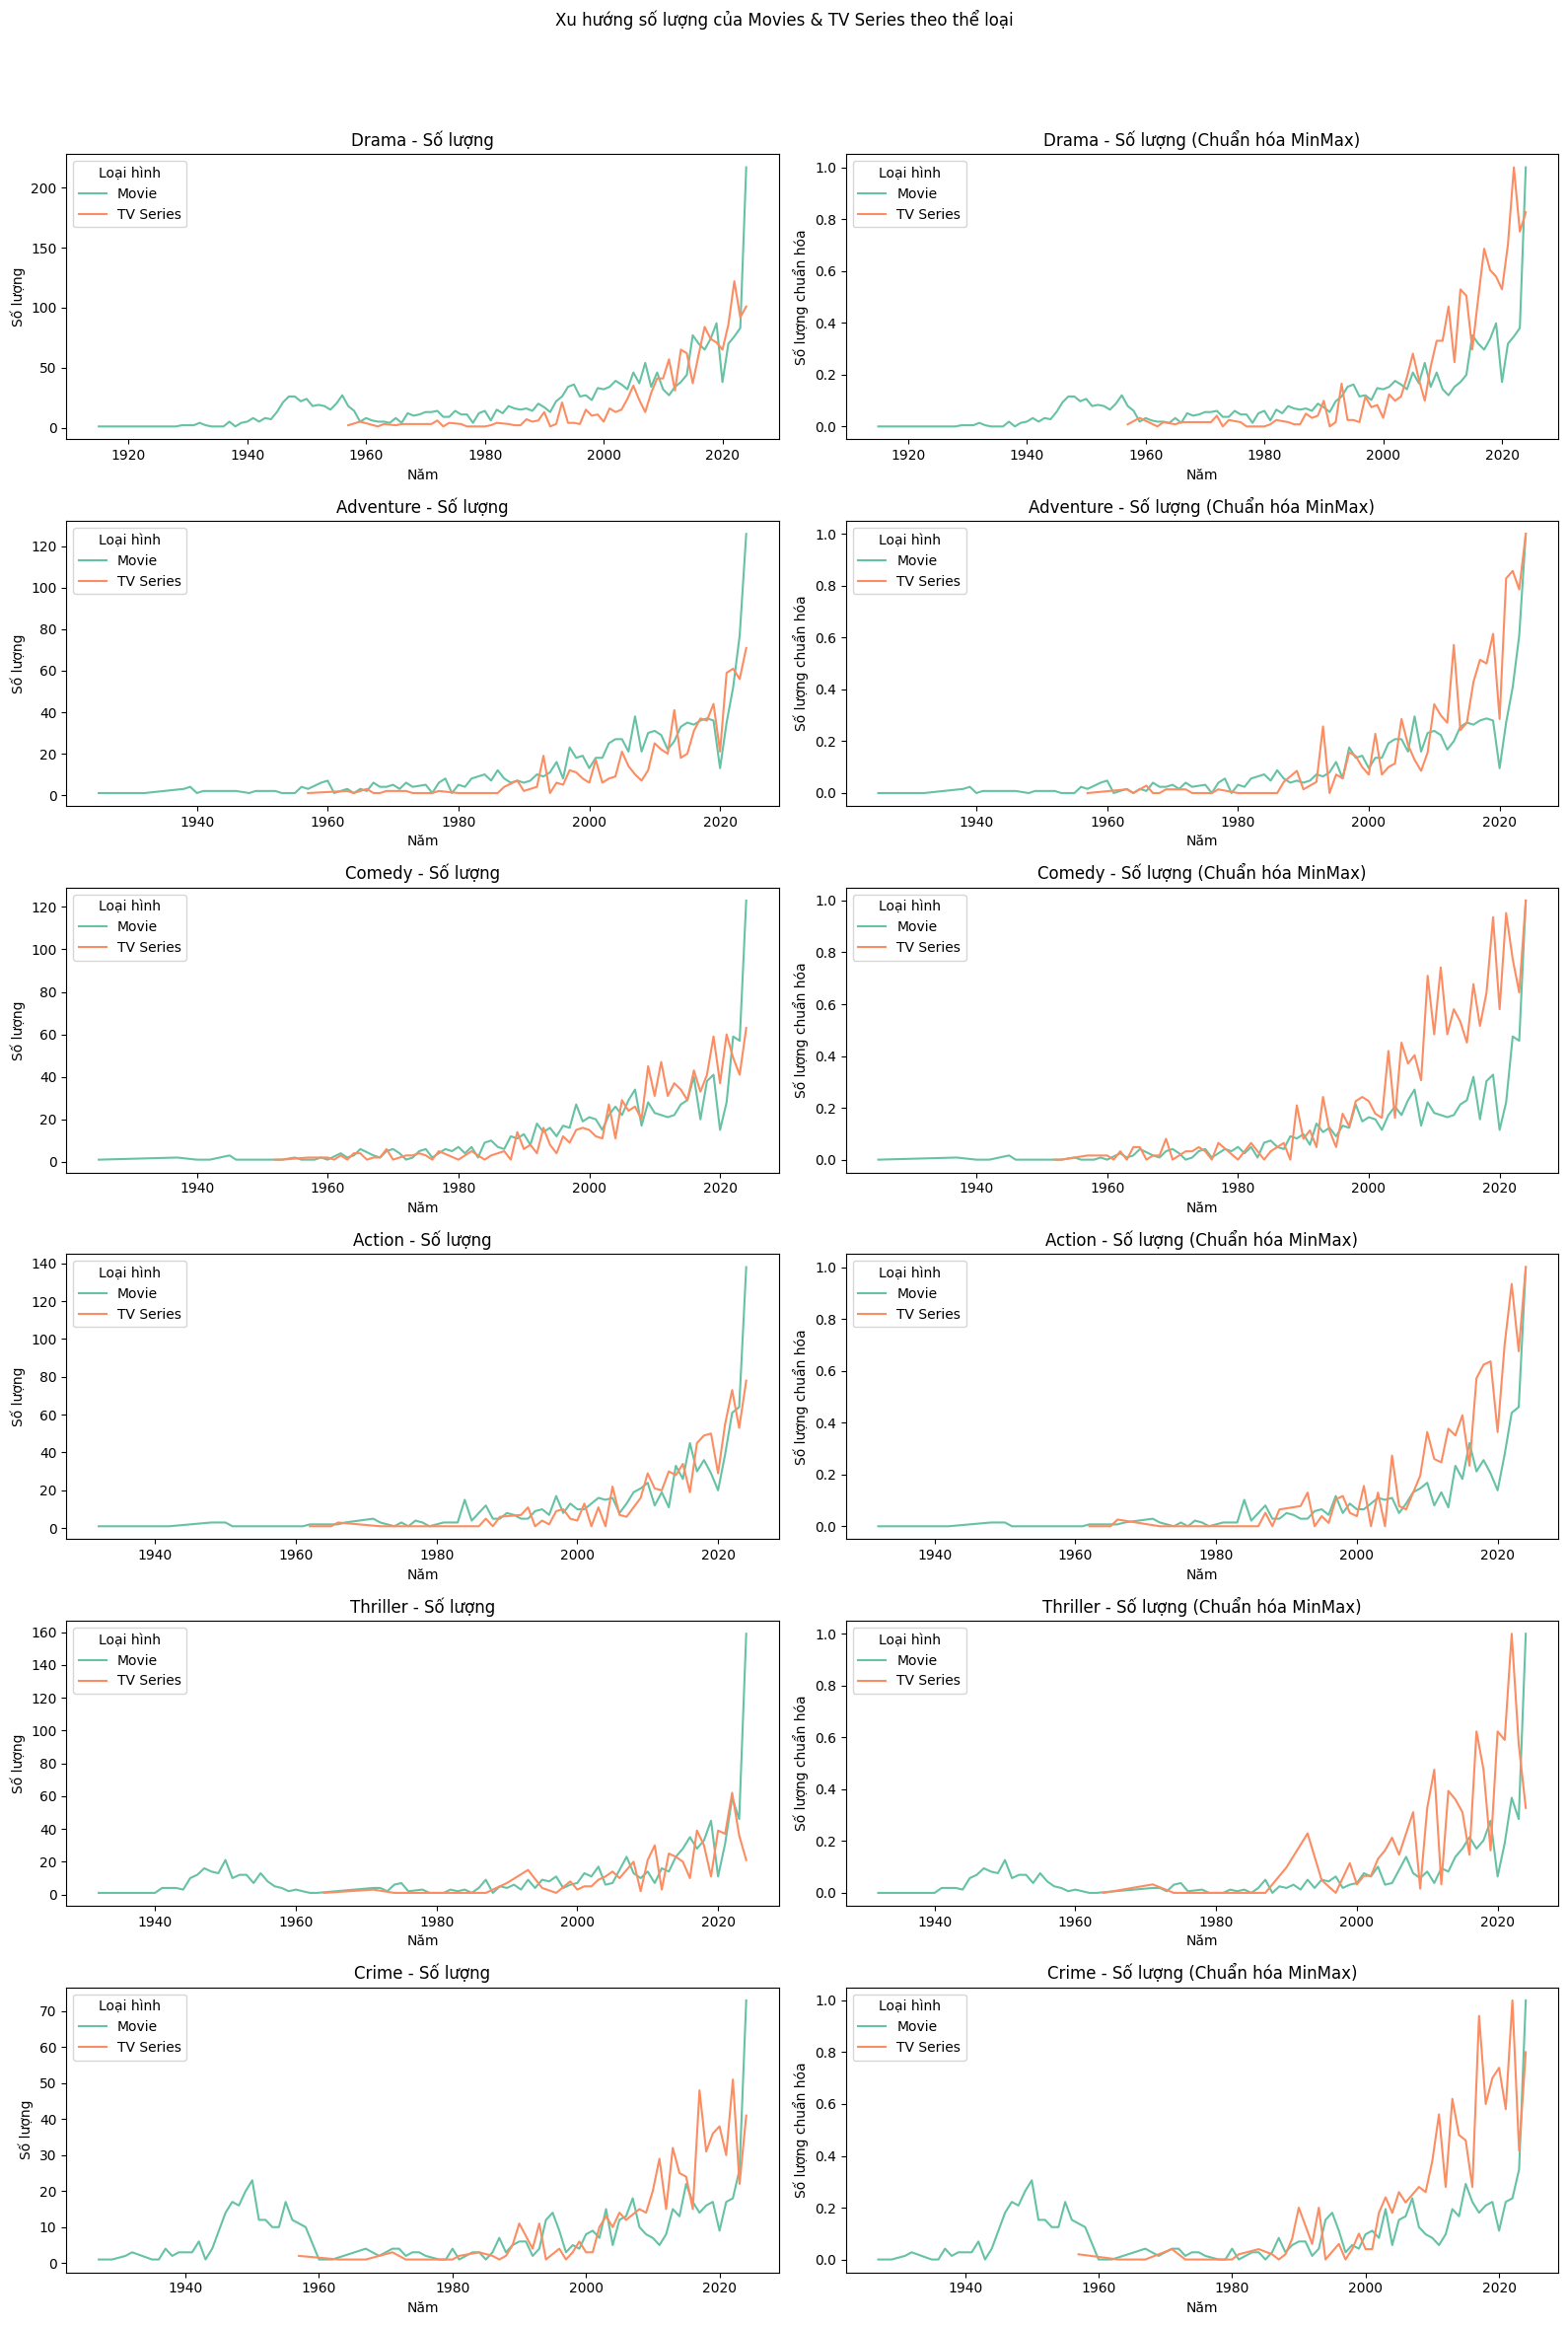

In [50]:
data = df.copy()

# Các thể loại cần lọc
selected_genres = ["Drama", "Adventure", "Comedy", "Action", "Thriller", "Crime"]

# Chuyển đổi cột 'genres' thành danh sách thể loại
data["genres_list"] = data["genres"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
data.dropna(subset=["release_date"], inplace=True)

# Hàm kiểm tra nếu một bộ phim thuộc thể loại đã chọn
def contains_selected_genre(genre_list):
    return any(genre in genre_list for genre in selected_genres)

# Lọc dữ liệu theo các thể loại đã chọn
filtered_df = data[data["genres_list"].apply(contains_selected_genre)]

# Lọc bỏ các dòng có giá trị release_date NaN
filtered_df = filtered_df.dropna(subset=["release_date"])
filtered_df["release_date"] = filtered_df["release_date"].astype(int)  # Chuyển thành kiểu số nguyên

# Tạo figure với layout 6x2
fig, axes = plt.subplots(6, 2, figsize=(16, 24))
fig.suptitle("Xu hướng số lượng của Movies & TV Series theo thể loại")

for i, genre in enumerate(selected_genres):
    genre_df = filtered_df[filtered_df["genres_list"].apply(lambda x: genre in x)]

    # Xu hướng số lượng phim theo năm
    genre_count_trend = genre_df.groupby(["release_date", "type"]).size().reset_index(name="count")
    
    ax = axes[i, 0]
    sns.lineplot(data=genre_count_trend, x="release_date", y="count", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Số lượng")
    ax.set_xlabel("Năm")
    ax.set_ylabel("Số lượng")
    ax.legend(title="Loại hình")

    # Chuẩn hóa riêng cho Movies và TV Series
    genre_count_trend_movies = genre_count_trend[genre_count_trend["type"] == "Movie"].copy()
    genre_count_trend_tv = genre_count_trend[genre_count_trend["type"] == "TV Series"].copy()
    
    scaler_movies = MinMaxScaler()
    scaler_tv = MinMaxScaler()
    
    if not genre_count_trend_movies.empty:
        genre_count_trend_movies[["count"]] = scaler_movies.fit_transform(genre_count_trend_movies[["count"]])
    if not genre_count_trend_tv.empty:
        genre_count_trend_tv[["count"]] = scaler_tv.fit_transform(genre_count_trend_tv[["count"]])
    
    genre_count_trend_scaled = pd.concat([genre_count_trend_movies, genre_count_trend_tv])
    
    ax = axes[i, 1]
    sns.lineplot(data=genre_count_trend_scaled, x="release_date", y="count", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Số lượng (Chuẩn hóa MinMax)")
    ax.set_xlabel("Năm")
    ax.set_ylabel("Số lượng chuẩn hóa")
    ax.legend(title="Loại hình")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Nhận xét  đồ thị:
1. Ảnh hưởng của chuẩn hóa MinMax:
- Trước khi chuẩn hóa: cho thấy sự cách biệt về quy mô của TV series và Movies khiến cho TV series luôn lép vế so với movies.
- Sau khi chuẩn hóa, các xu hướng trở nên rõ ràng hơn, giúp so sánh sự tăng trưởng giữa Movies và TV Series theo từng giai đoạn.
- Các đường tăng trưởng của TV Series trở nên gần hơn với Movies.
- Qua năm 2000, TV series có sự tăng trưởng mạnh mẽ hơn so với Movies.
2. Sự phân bố của các thể loại theo TV series và movies:
- Drama, Comedy, Action, Thriller: TV Series có tốc độ tăng trưởng nhanh hơn Movies, đặc biệt từ những năm 2000 trở đi.
- Adventure, Crime: Movies vẫn giữ vị trí dẫn đầu, nhưng TV Series đang dần thu hẹp khoảng cách.
3. Tóm lại:
- TV Series đang ngày càng thống trị trong các thể loại như Drama, Comedy và Action.
- Movies vẫn giữ vị trí quan trọng trong các thể loại Adventure và Crime.
- Sự phát triển mạnh mẽ của nền tảng streaming như Netflix, Disney+, HBO Max có thể là nguyên nhân chính cho xu hướng tăng của TV Series.

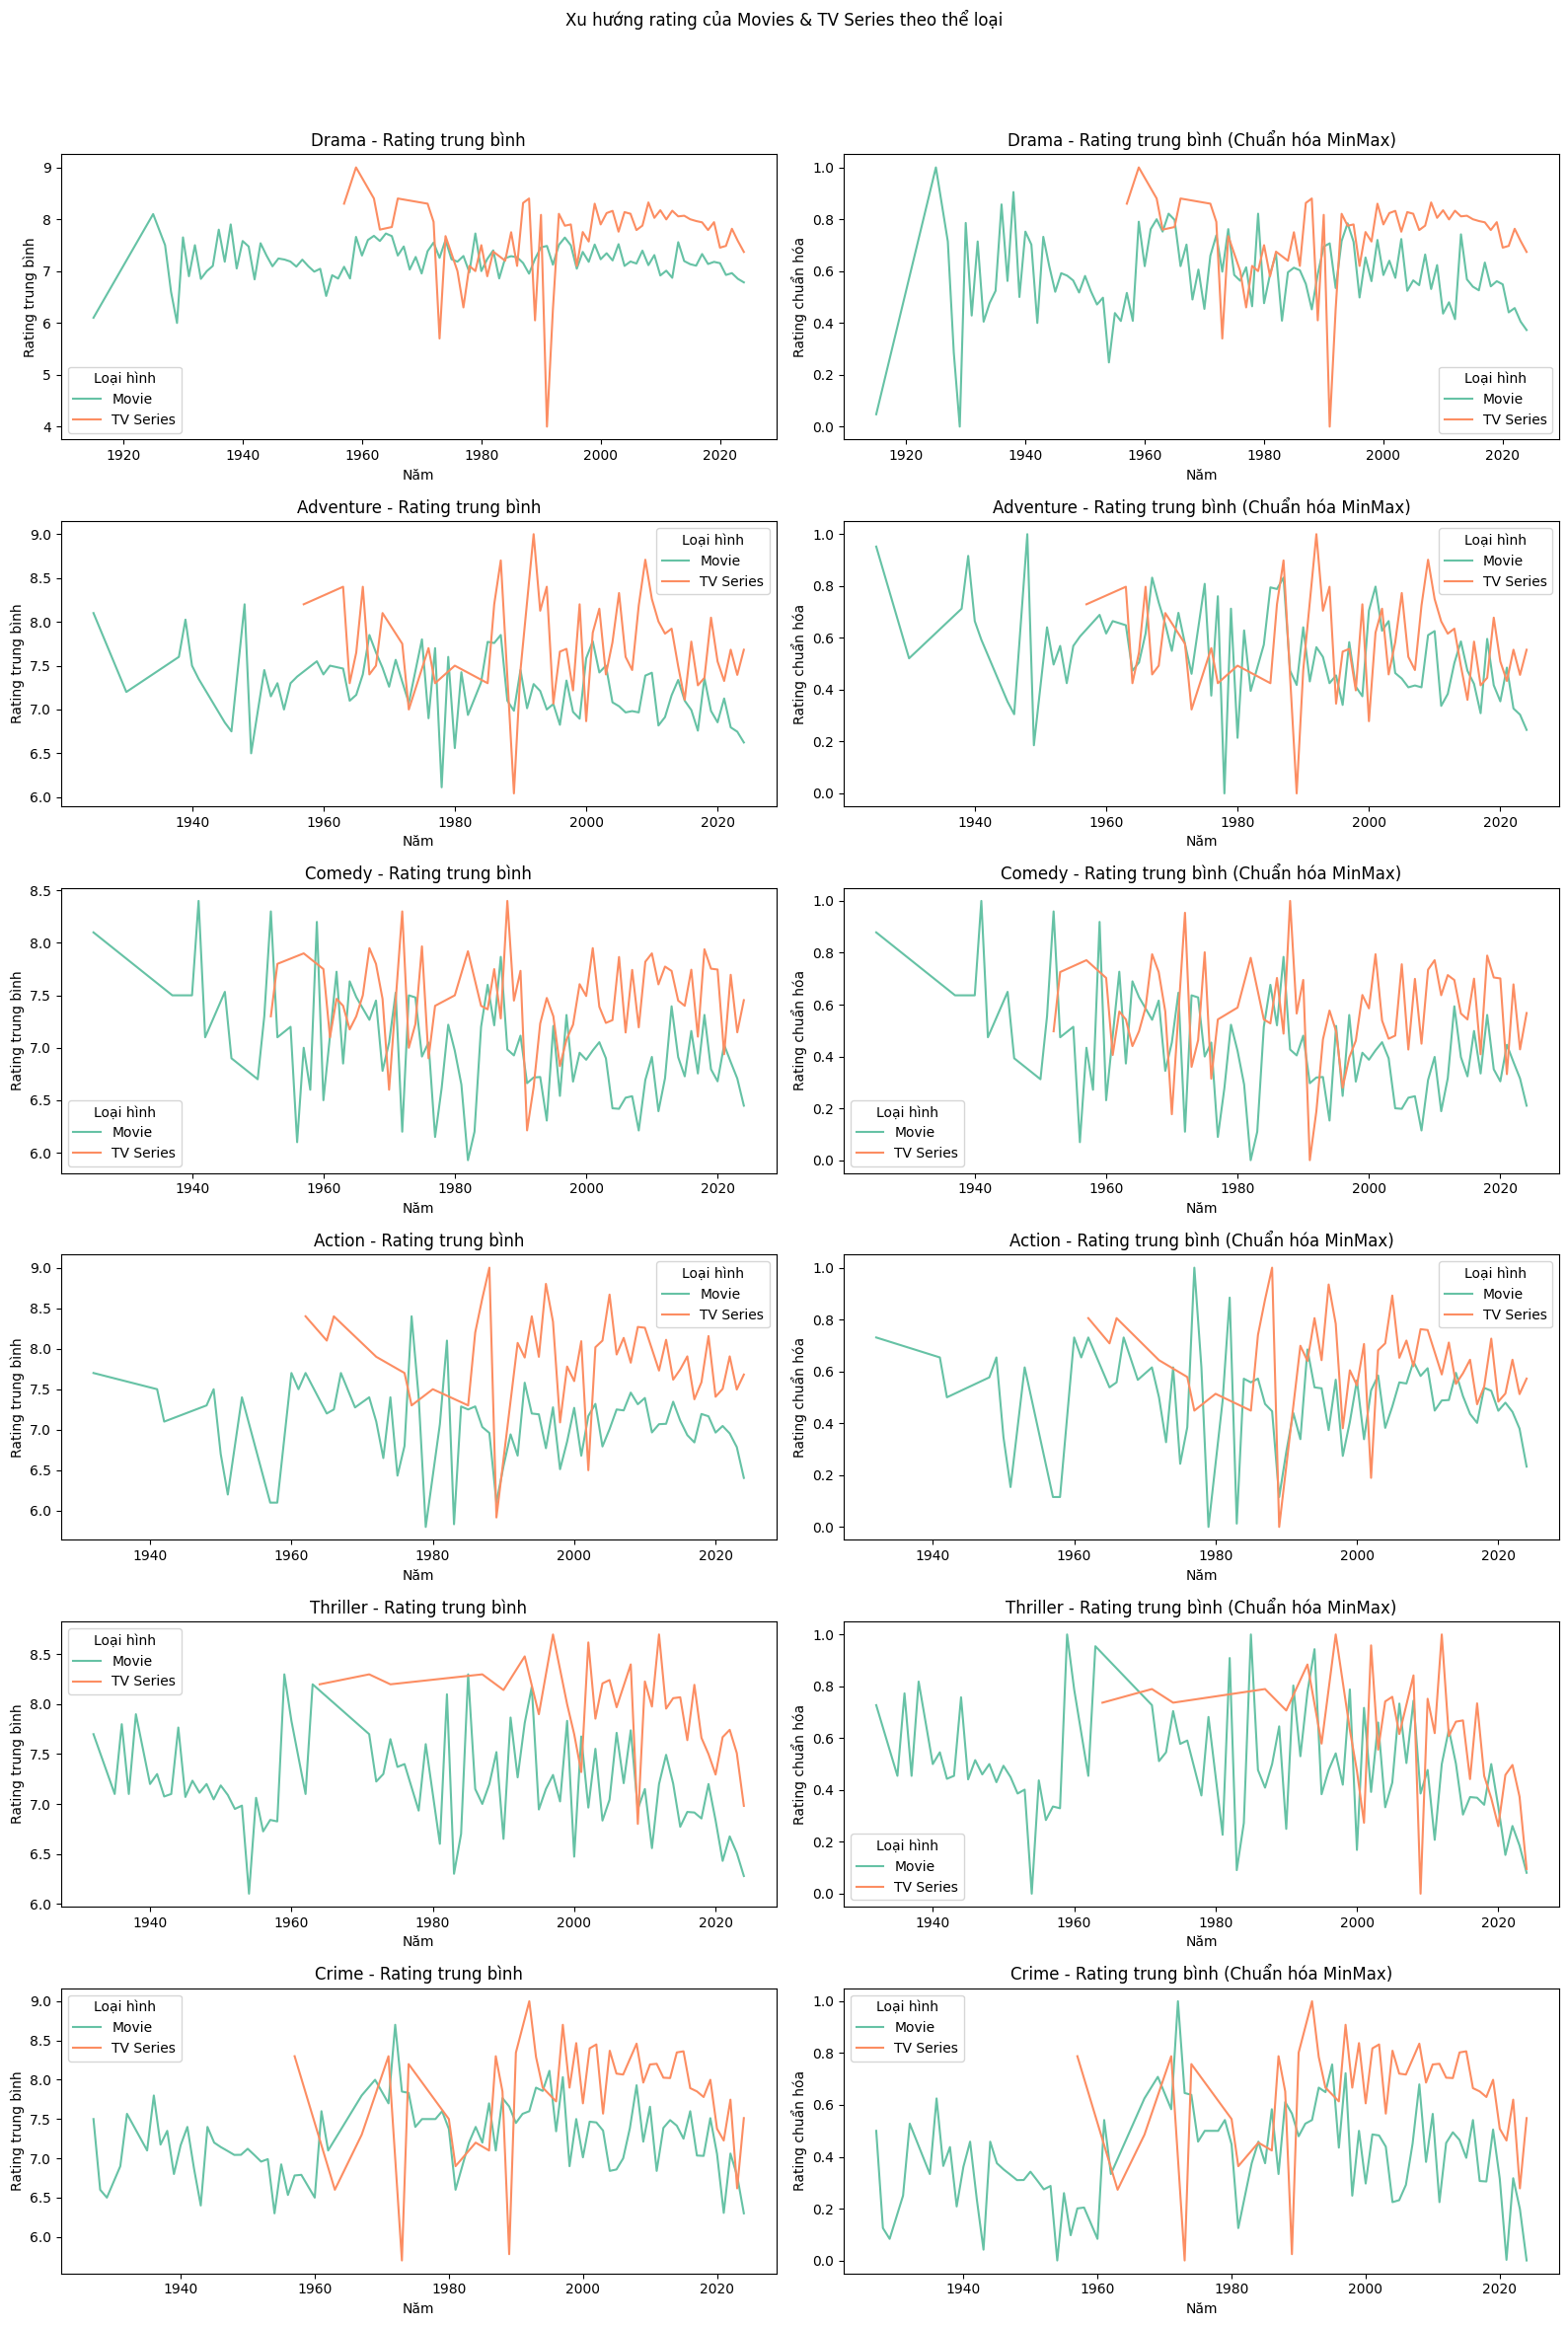

In [55]:
# Tạo figure với layout 6x2
fig, axes = plt.subplots(6, 2, figsize=(16, 24))
fig.suptitle("Xu hướng rating của Movies & TV Series theo thể loại")

for i, genre in enumerate(selected_genres):
    genre_df = filtered_df[filtered_df["genres_list"].apply(lambda x: genre in x)]

    # Xu hướng rating trung bình theo năm
    genre_rating_trend = genre_df.groupby(["release_date", "type"])["rating"].mean().reset_index()
    
    ax = axes[i, 0]
    sns.lineplot(data=genre_rating_trend, x="release_date", y="rating", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Rating trung bình")
    ax.set_xlabel("Năm")
    ax.set_ylabel("Rating trung bình")
    ax.legend(title="Loại hình")

    # Chuẩn hóa riêng cho Movies và TV Series
    genre_rating_trend_movies = genre_rating_trend[genre_rating_trend["type"] == "Movie"].copy()
    genre_rating_trend_tv = genre_rating_trend[genre_rating_trend["type"] == "TV Series"].copy()
    
    scaler_movies = MinMaxScaler()
    scaler_tv = MinMaxScaler()
    
    if not genre_rating_trend_movies.empty:
        genre_rating_trend_movies[["rating"]] = scaler_movies.fit_transform(genre_rating_trend_movies[["rating"]])
    if not genre_rating_trend_tv.empty:
        genre_rating_trend_tv[["rating"]] = scaler_tv.fit_transform(genre_rating_trend_tv[["rating"]])
    
    genre_rating_trend_scaled = pd.concat([genre_rating_trend_movies, genre_rating_trend_tv])
    
    ax = axes[i, 1]
    sns.lineplot(data=genre_rating_trend_scaled, x="release_date", y="rating", hue="type", palette="Set2", ax=ax)
    ax.set_title(f"{genre} - Rating trung bình (Chuẩn hóa MinMax)")
    ax.set_xlabel("Năm")
    ax.set_ylabel("Rating chuẩn hóa")
    ax.legend(title="Loại hình")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Nhận xét  đồ thị:
1. Ảnh hưởng của chuẩn hóa MinMax
- Trước khi chuẩn hóa:

    Rating của Movies và TV Series có sự khác biệt đáng kể, đặc biệt TV Series thường có sự dao động ít hơn so với Movies.<br>
    Một số giai đoạn có sự chênh lệch lớn giữa hai loại hình.<br>
- Sau khi chuẩn hóa:

    Xu hướng rating của Movies và TV Series ko có sự khác biệt nhiều.<br
    TV Series có sự ổn định hơn so với Movies trong một số thể loại.<br
2. Xu hướng rating theo từng thể loại
- Drama, Comedy, Action, Thriller:
    TV Series thường có rating ổn định và cao hơn Movies trong những năm gần đây.<br>
    Đặc biệt từ sau 2000, TV Series có xu hướng tăng nhẹ về rating so với Movies.<br
- Adventure, Crime:

    Rating của Movies vẫn cao và ổn định hơn so với TV Series trong phần lớn thời gian.<br>
    Tuy nhiên, TV Series đang có xu hướng tiệm cận với Movies ở những năm gần đây.<br
3. Tóm lại
- Movies có rating dao động mạnh hơn, thể hiện rõ rệt hơn ở các giai đoạn trước năm 2000.
- TV Series có rating ổn định và có xu hướng tăng dần trong nhiều thể loại.
- Sự phát triển của streaming platforms (Netflix, Disney+, HBO Max, Amazon Prime,...) đã thúc đẩy sự cải thiện chất lượng của TV Series, giúp duy trì mức rating cao và ổn định hơn.

### Kết luận & Dự đoán Tương Lai
1. Kết luận từ dữ liệu hiện tại
- Số lượng TV Series đang gia tăng mạnh mẽ, đặc biệt từ sau năm 2000, cho thấy xu hướng dịch chuyển từ phim điện ảnh sang nội dung truyền hình dài tập.
- Movies vẫn duy trì vị thế quan trọng, đặc biệt ở các thể loại như Adventure và Crime, nhưng tốc độ tăng trưởng về số lượng chậm hơn so với TV Series.
- TV Series có xu hướng đạt rating cao và ổn định hơn so với Movies, phản ánh sự đầu tư chất lượng nội dung tốt hơn, đặc biệt nhờ sự phát triển của các nền tảng streaming.
- Thể loại Drama, Comedy, Action và Thriller là những lĩnh vực mà TV Series đang có tốc độ phát triển tốt hơnhơn.
2️. Dự đoán tương lai
- TV Series sẽ tiếp tục phát triển mạnh, nhờ sự bùng nổ của nền tảng streaming như Netflix, Disney+, HBO Max, Amazon Prime,...
- Số lượng phát hành của Movies đang tăng mạnh nhờ sự phát triển công nghệ nhưng TV series sẽ dần đuổi kịp và được ưa chuộng hơn nhờ chất lượng tốt.
- Sự kết hợp giữa TV Series & Movies sẽ phổ biến hơn (Ví dụ: TV Series mở rộng vũ trụ điện ảnh như Marvel, Star Wars, The Witcher, Dune,...) để tận dụng sức mạnh của cả hai loại hình.
- Một số thể loại như Adventure & Crime có thể chứng kiến sự trỗi dậy của TV Series, thu hẹp khoảng cách với Movies trong tương lai gần.